In [131]:
# import zipfile

# # List of zip file paths
# zip_file_paths = ['trainImages.zip', 'validationImages.zip']

# # Loop through each zip file path
# for path in zip_file_paths:
#     # Convert the path to a string (optional but shown in the original code)
#     name = str(path)
    
#     # Open the zip file
#     with zipfile.ZipFile(path, 'r') as zip_ref:
#         # Extract all contents of the zip file into a specified directory
#         zip_ref.extractall(f'unzipped/{name.split(".")[0]}')


In [1]:
import numpy as numpy
import pandas as pd

In [2]:
df_validation = pd.read_csv('./unzipped/validationImages/labels/detections.csv')
df_train = pd.read_csv('./unzipped/trainImages/labels/detections.csv')

In [3]:
df_validation.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,0001eeaf4aed83f9,xclick,/m/0cmf2,1,0.022673,0.964201,0.071038,0.800546,0,0,0,0,0
1,000595fe6fee6369,xclick,/m/02wbm,1,0.000000,1.000000,0.000000,1.000000,0,0,1,0,0
2,000595fe6fee6369,xclick,/m/02xwb,1,0.141384,0.179676,0.676275,0.731707,0,0,0,0,0
3,000595fe6fee6369,xclick,/m/02xwb,1,0.213549,0.253314,0.299335,0.354767,1,0,0,0,0
4,000595fe6fee6369,xclick,/m/02xwb,1,0.232695,0.288660,0.490022,0.545455,1,0,0,0,0


In [4]:
df_train.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,...,0,0,0.148438,0.012500,0.059375,0.195312,0.148438,0.357812,0.587500,0.325000
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,...,0,0,0.025000,0.248438,0.276563,0.214062,0.914062,0.714063,0.782813,0.948438
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,...,0,0,0.243750,0.151562,0.310937,0.262500,0.198437,0.434375,0.507812,0.590625
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,...,0,0,0.315625,0.429688,0.256250,0.423438,0.651563,0.921875,0.826562,0.925000
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,...,0,0,0.317188,0.257812,0.346875,0.307812,0.235938,0.289062,0.348438,0.385938


In [5]:
len(df_train)

14610229

In [6]:
len(df_validation)

303980

In [7]:
data_path_validation = 'unzipped/validationImages/data/*.jpg'
data_path_train = 'unzipped/trainImages/data/*.jpg'

In [8]:
import glob
counter=0

img_paths = data_path_train
folder=glob.glob(img_paths)

for i in folder:
    counter+=1
print(counter)

517


In [9]:
import glob
counter=0

img_paths = data_path_validation
folder=glob.glob(img_paths)

for i in folder:
    counter+=1
print(counter)

9


In [10]:
# unzipped/trainImages/data/000002b66c9c498e.jpg
# unzipped/validationImages/data/000595fe6fee6369.jpg

In [11]:
import glob

train_list_ids=[]
validation_list_ids=[]

def get_ids(split, print_this,to_append_list):
    start=0
    end=0
    if split == data_path_train:
        start,end = 26,42
    elif split ==data_path_validation:
        start,end = 31,47
    else:
        raise Exception('Invalid Parameter')

    folder = split
    img_paths = glob.glob(folder)
    img_ids = to_append_list

    for i in img_paths:
        id = i[start:end]
        img_ids.append(id)
    print(len(img_ids))
    print(print_this)



In [12]:
get_ids(data_path_train,"I finished train task",train_list_ids)

517
I finished train task


In [13]:
train_list_ids[0]

'003bfa647c199309'

In [14]:
get_ids(data_path_validation,"I finished validation task",validation_list_ids)

9
I finished validation task


In [15]:
validation_list_ids[0]

'b300a5975ac68399'

In [16]:
len(train_list_ids),len(validation_list_ids)

(517, 9)

In [17]:
train_classes_df=pd.read_csv('unzipped/trainImages/metadata/classes.csv',names=['className','object'])
validation_classes_df=pd.read_csv('unzipped/validationImages/metadata/classes.csv',names=['className','object'])

In [18]:
train_classes_df

,className,object
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football
...,...,...
596,/m/0qmmr,Wheelchair
597,/m/0wdt60w,Rugby ball
598,/m/0xfy,Armadillo
599,/m/0xzly,Maracas


In [19]:
validation_classes_df

,className,object
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football
...,...,...
596,/m/0qmmr,Wheelchair
597,/m/0wdt60w,Rugby ball
598,/m/0xfy,Armadillo
599,/m/0xzly,Maracas


In [20]:
train_classes_df[train_classes_df['object']=="Plastic bag"]

,className,object
327,/m/05gqfk,Plastic bag


In [21]:
validation_classes_df[validation_classes_df['object']=="Plastic bag"]

,className,object
327,/m/05gqfk,Plastic bag


In [22]:
import random

def random_row_from_df(split):
    dataframe = ''

    if split=="train":
        dataframe,ids_to_check = df_train, train_list_ids
    elif split=="validation":
        dataframe,ids_to_check = df_validation, validation_list_ids
    else:
        raise Exception("Invalid Parameter")

    img_ids_len = len(ids_to_check)
    rand = random.randint(0,img_ids_len-1)
    id = ids_to_check[rand]
    r = dataframe.loc[(dataframe.ImageID==id) & (dataframe.LabelName == "/m/05gqfk")]
    # print(r)
    return r
    


    

In [23]:
random_row_from_df('train')

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
7841460,84f956ec753d7794,xclick,/m/05gqfk,1,0.000,0.071875,0.400000,0.561667,0,1,...,0,0,0.013750,0.000,0.022500,0.071875,0.400000,0.484167,0.561667,0.524167
7841461,84f956ec753d7794,xclick,/m/05gqfk,1,0.000,0.999375,0.000833,0.999167,0,1,...,0,0,0.123125,0.000,0.256250,0.999375,0.000833,0.935833,0.999167,0.940833
7841462,84f956ec753d7794,xclick,/m/05gqfk,1,0.065,0.141250,0.501667,0.543333,0,0,...,0,0,0.081875,0.065,0.105625,0.141250,0.501667,0.511667,0.543333,0.524167


In [24]:
random_row_from_df('validation')

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
276292,e80333c5111504d1,xclick,/m/05gqfk,1,0.0,0.998437,0.05,0.9625,0,0,0,0,0


In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image
import glob

image_path_validation = 'unzipped/validationImages/data/*.jpg'
image_path_train = 'unzipped/trainImages/data/*.jpg'

def visulaize_random_image(split):
    split_path=""
    if split=="train":
        split_path=image_path_train
    elif split=="validation":
        split_path = image_path_validation
    else:
        raise Exception("Invalid Parameter")
        
    images_folder=split_path
    images_path=glob.glob(images_folder)
    num_of_images=len(images_path)
    random_int = random.randint(0,num_of_images-1)
    random_image=images_path[random_int]
    img = mpimg.imread(random_image)

    plt.imshow(img)
    plt.axis('off') 
    plt.show()
    


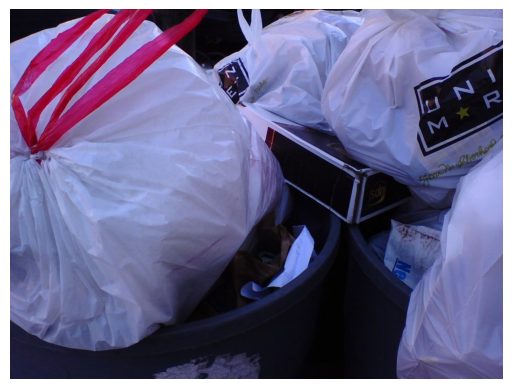

In [26]:
visulaize_random_image('train')

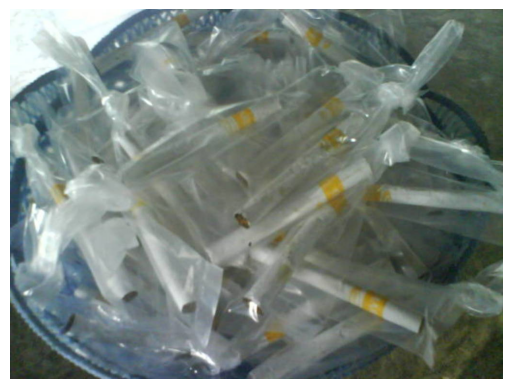

In [27]:
visulaize_random_image('validation')

IndexError: list index out of range

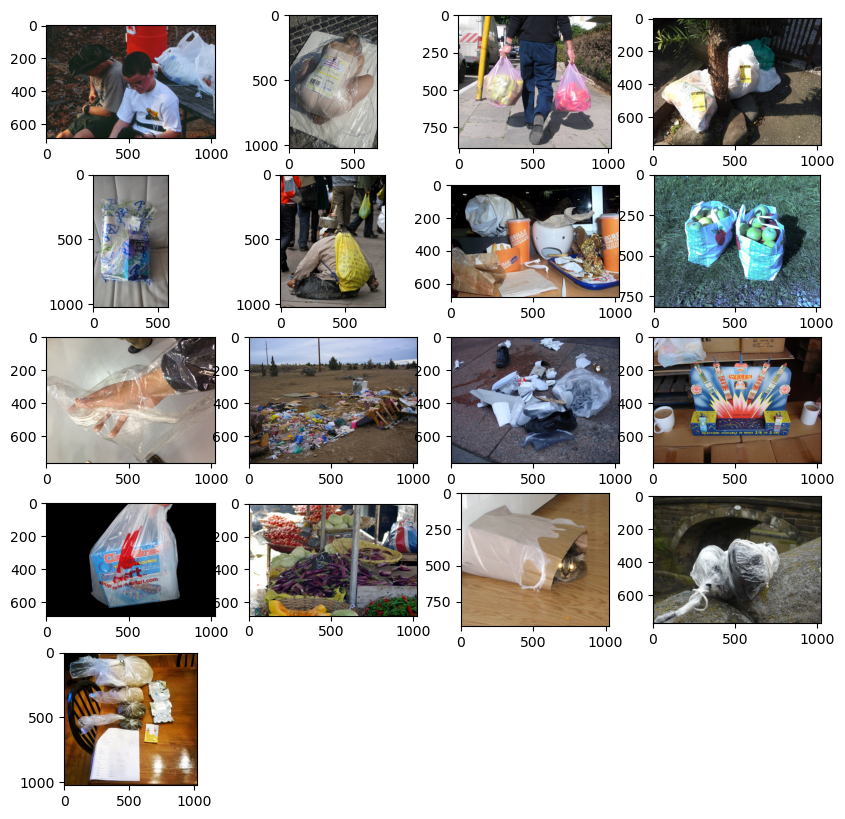

In [45]:
import matplotlib.pyplot as pyplot
import glob
import matplotlib.image as mpimg

fig = plt.figure(figsize=(10,10))

columns=4
rows=5

image_path_validation = 'unzipped/validationImages/data/*.jpg'
image_path_train = 'unzipped/trainImages/data/*.jpg'

def visulaize_many_images(from_num,to_num,dataset):
    
    dataset_path=""
    if dataset=="train":
        dataset_path=image_path_train
    elif dataset=="validation":
        dataset_path = image_path_validation
    else:
        raise Exception("Invalid Parameter")
      
    images_path = glob.glob(dataset_path)

    index_counter = 1

    for i in range(from_num,to_num):
        counter = i
        image = images_path[counter]
        img = mpimg.imread(image)
        fig.add_subplot(rows,columns,index_counter)
        plt.imshow(img)
        index_counter+=1

    plt.show()

visulaize_many_images(500,520,'train')